In [2869]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

In [2870]:
#Import dataset
df = pd.read_csv('project1_1.csv', index_col='Unnamed: 0')
df.head()

,X,Y,Class
0,0.871319,0.490718,0.0
1,0.715472,-0.458668,1.0
2,1.462538,-0.386599,1.0
3,-0.222521,0.974928,0.0
4,0.327699,-0.240278,1.0


<font size = "6">Task 1</font><br>
<font size = "5">Part 1</font><br>
<font size = "4">LDA</font>

In [2871]:
#LDA Algorithm
def LDA(class0, class1):
    m0 = class0.mean(axis = 0)
    m1 = class1.mean(axis = 0)
    Sw = (class0-m0).T@(class0-m0) + (class1-m1).T@(class1-m1)
    Sw_inv = np.linalg.pinv(Sw)
    w = Sw_inv.T@(m1-m0)
    w_hat = w / np.linalg.norm(w)
    return w_hat

<font size = "4">Perceptron</font>

In [2872]:
#Perceptron Algorithm
def Perceptron(x, y, epochs):
    x_new = np.insert(x, 0, 1, axis=1)
    w = np.zeros(x_new.shape[1])
    
    for i in range(epochs): #epochs
        for j in range(x_new.shape[0]):
            z = x_new[j]@w
            y_pred = 1 if z >= 0 else 0
            error = y_pred - y[j]
            w -= error * x_new[j]
    return w

<font size = "4">Logistic Regression</font>

In [2873]:
#Logistic Regression Algorithm
def LogisticRegression(x, y, epochs):
    w = np.zeros(x.shape[1])
    
    for i in range(epochs):
        z = x@w
        y_pred = 1 / (1 + np.exp(-z))
        error = y_pred - y
        gradient = np.dot(x.T, error) / len(y)
        w -= gradient
    return w

<font size = "5">Part 2</font>

In [2874]:
#Split dataset into label and target variables
label = df.drop('Class', axis=1)
target = df['Class']

#Split dataset into label and target variables by classification
label0 = df[df['Class'] == 0.0].drop('Class', axis=1).reset_index(drop=True)
target0 = df[df['Class'] == 0.0]['Class'].reset_index(drop=True)
label1 = df[df['Class'] == 1.0].drop('Class', axis=1).reset_index(drop=True)
target1 = df[df['Class'] == 1.0]['Class'].reset_index(drop=True)

In [2875]:
#Convert to numpy arrays
x = np.array(label)
y = np.array(target)

x0 = np.array(label0)
y0 = np.array(target0)
x1 = np.array(label1)
y1 = np.array(target1)

<font size = "4">LDA</font>

In [2876]:
#Implement LDA algorithm
lda = LDA(x0, x1)
lda_class_guess = []
for i in x:
    guess = 0
    for j in range(len(lda)):
        guess += i[j] * lda[j]
    #Classify prediction
    if guess > 0:
        lda_class_guess.append(1)
    else:
        lda_class_guess.append(0)
    
print(accuracy_score(y, lda_class_guess))

0.87


<font size = "4">Perceptron</font>

In [2877]:
#Implement Perceptron algorithm
perceptron = Perceptron(x, y, 100)
perceptron_class_guess = []
for i in x:
    guess = perceptron[0] 
    for j in range(len(perceptron)-1):
        guess += i[j] * perceptron[j+1]
    #Classify prediction
    if guess > 0:
        perceptron_class_guess.append(1)
    else:
        perceptron_class_guess.append(0)
    
print(accuracy_score(y, perceptron_class_guess))

0.85


<font size = "4">Logistic Regression</font>

In [2878]:
#Implement Logistic Regression algorithm
logreg = LogisticRegression(x, y, 100)
logreg_class_guess = []
for i in x:
    guess = 0
    for j in range(len(logreg)):
        guess += i[j] * logreg[j]
    #Classify prediction
    if guess > 0:
        logreg_class_guess.append(1)
    else:
        logreg_class_guess.append(0)
    
print(accuracy_score(y, logreg_class_guess))

0.86


<font size = "5">Part 3</font><br>
<font size = "4">LDA</font>

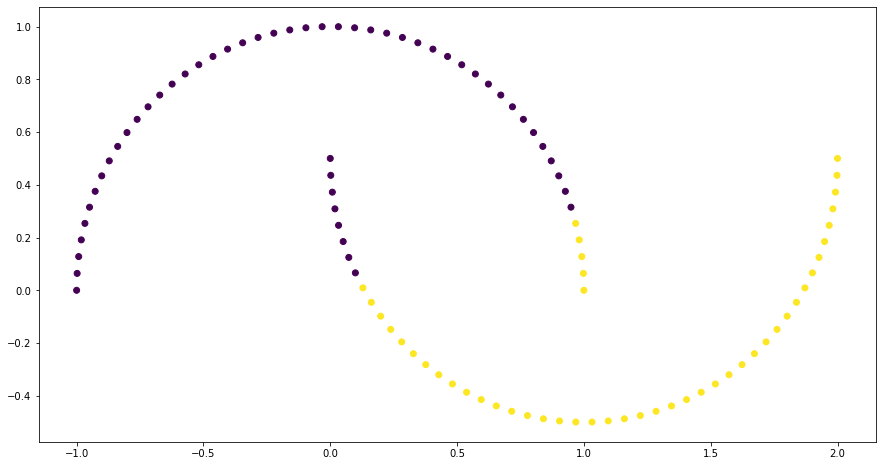

In [2879]:
#Scatter plot of LDA algorithm by classification prediction
plt.figure(figsize=(15, 8))
plt.scatter(label['X'],label['Y'], c=lda_class_guess)
plt.show()

<font size = "4">Perceptron</font>

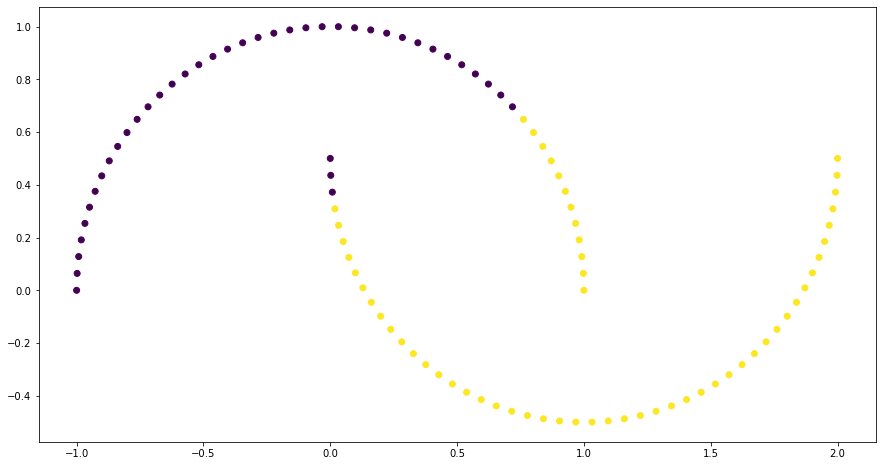

In [2880]:
#Scatter plot of Preceptron algorithm by classification prediction
plt.figure(figsize=(15, 8))
plt.scatter(label['X'],label['Y'], c=perceptron_class_guess)
plt.show()

<font size = "4">Logistic Regression</font>

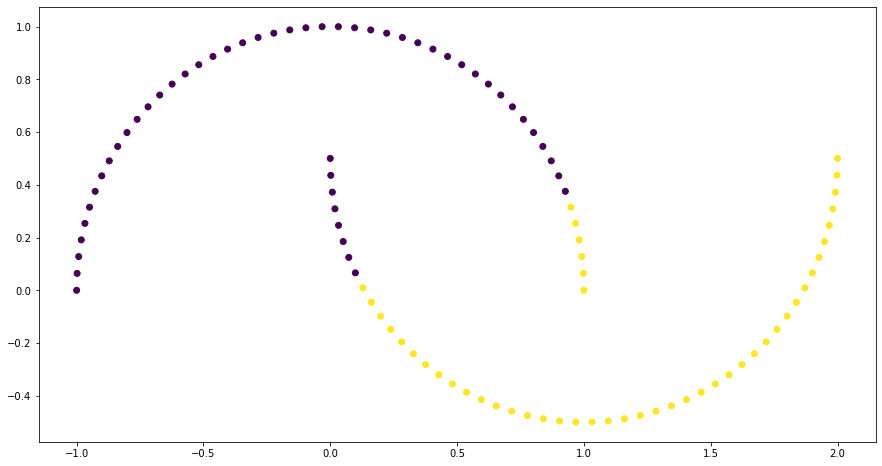

In [2881]:
#Scatter plot of Logistic Regression algorithm by classification prediction
plt.figure(figsize=(15, 8))
plt.scatter(label['X'],label['Y'], c=logreg_class_guess)
plt.show()

<font size = "6">Task 2</font><br>
<font size = "5">Part 1</font>

In [2882]:
#Create copy of data frame
df_new = df.copy(deep = False)
df_new.head()

,X,Y,Class
0,0.871319,0.490718,0.0
1,0.715472,-0.458668,1.0
2,1.462538,-0.386599,1.0
3,-0.222521,0.974928,0.0
4,0.327699,-0.240278,1.0


In [2883]:
#Split dataset into label and target variables
label_new = df_new.drop('Class', axis=1)
target_new = df_new['Class']

#Split dataset into label and target variables by classification
label_new0 = df_new[df_new['Class'] == 0.0].drop('Class', axis=1).reset_index(drop=True)
target_new0 = df_new[df_new['Class'] == 0.0]['Class'].reset_index(drop=True)
label_new1 = df_new[df_new['Class'] == 1.0].drop('Class', axis=1).reset_index(drop=True)
target_new1 = df_new[df_new['Class'] == 1.0]['Class'].reset_index(drop=True)

In [2884]:
#Convert to numpy arrays
x_new = np.array(label_new)
y_new = np.array(target_new)

x_new0 = np.array(label_new0)
y_new0 = np.array(target_new0)
x_new1 = np.array(label_new1)
y_new1 = np.array(target_new1)

In [2885]:
#Create 3rd degree polynomial features
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_new)
x_poly0 = poly.fit_transform(x_new0)
x_poly1 = poly.fit_transform(x_new1)
#Based on the plot of the data, the 3rd degree polynomial looks to be the optimal choice

In [2886]:
#Linearity
ols = LinearRegression()
ols.fit(x_poly, y_new)
print("RSS: %.2f" % np.sum((ols.predict(x_poly) - y_new) ** 2))
print("R^2: %.5f" % ols.score(x_poly, y_new))
#There is an obvious linear relationship between the 3rd degree polynomial features and the classification prediction

RSS: 0.05
R^2: 0.99793


In [2887]:
#Independence
corr_matrix = np.c_[x_poly, y_new]
pd.DataFrame(corr_matrix).corr()
#The polynomial features are obviously correlated with X and/or Y, but X and Y themselves are uncorrelated

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,-0.436869,0.737474,0.299626,-0.334708,0.838895,-0.057152,0.629767,-0.368772,0.573539
2,NaN,-0.436869,1.000000,-0.322179,0.405879,0.766153,-0.256570,0.529870,-0.264889,0.866861,-0.761706
3,NaN,0.737474,-0.322179,1.000000,0.163572,-0.437711,0.950037,0.195711,0.261665,-0.406028,0.422970
4,NaN,0.299626,0.405879,0.163572,1.000000,0.058343,0.282576,0.711386,0.500918,0.180255,-0.167240
5,NaN,-0.334708,0.766153,-0.437711,0.058343,1.000000,-0.335239,0.092216,-0.107336,0.954244,-0.583584
6,NaN,0.838895,-0.256570,0.950037,0.282576,-0.335239,1.000000,0.226794,0.320375,-0.296245,0.518283
7,NaN,-0.057152,0.529870,0.195711,0.711386,0.092216,0.226794,1.000000,-0.029958,0.194312,-0.297558
8,NaN,0.629767,-0.264889,0.261665,0.500918,-0.107336,0.320375,-0.029958,1.000000,-0.200033,0.286501
9,NaN,-0.368772,0.866861,-0.406028,0.180255,0.954244,-0.296245,0.194312,-0.200033,1.000000,-0.642976


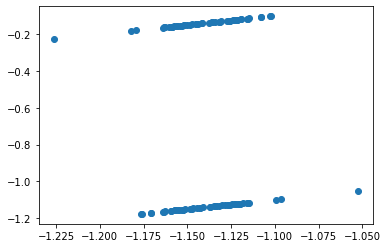

In [2888]:
#Homoscadasticity
y_pred = np.sum(ols.coef_ * x_poly, axis = 1)
residuals = y_pred - y_new
plt.scatter(residuals, y_pred)
plt.show()
#While there is an obvious split between classifications, there seems to be no pattern within the
#residuals of each classification

<font size = "5">Part 2</font><br>
<font size = "4">LDA</font>

In [2889]:
#Implement LDA algorithm using the polynomial features
lda = LDA(x_poly0, x_poly1)
lda_class_guess = []
guess_list = []
for i in x_poly:
    guess = 0
    for j in range(len(lda)):
        guess += i[j] * lda[j]
    guess_list.append(guess)
    if guess > -.1: #Not sure why, but if this value is set to 0 the algorithm classifies everything into one class
        lda_class_guess.append(1)
    else:
        lda_class_guess.append(0)
print(accuracy_score(y_new, lda_class_guess))

1.0


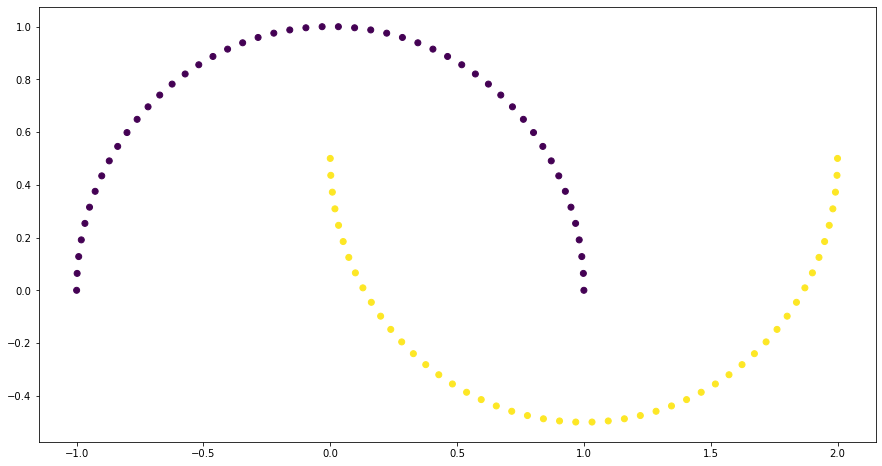

In [2890]:
#Scatter plot of updated LDA algorithm by classification prediction
plt.figure(figsize=(15, 8))
plt.scatter(label_new['X'],label_new['Y'], c=lda_class_guess)
plt.show()

<font size = "4">Perceptron</font>

In [2891]:
#Implement Perceptron algorithm using the polynomial features
perceptron = Perceptron(x_poly, y_new, 100)
perceptron_class_guess = []
for i in x_poly:
    guess = perceptron[0] 
    for j in range(len(perceptron)-1):
        guess += i[j] * perceptron[j+1]
    if guess > 0:
        perceptron_class_guess.append(1)
    else:
        perceptron_class_guess.append(0)
    
print(accuracy_score(y_new, perceptron_class_guess))

1.0


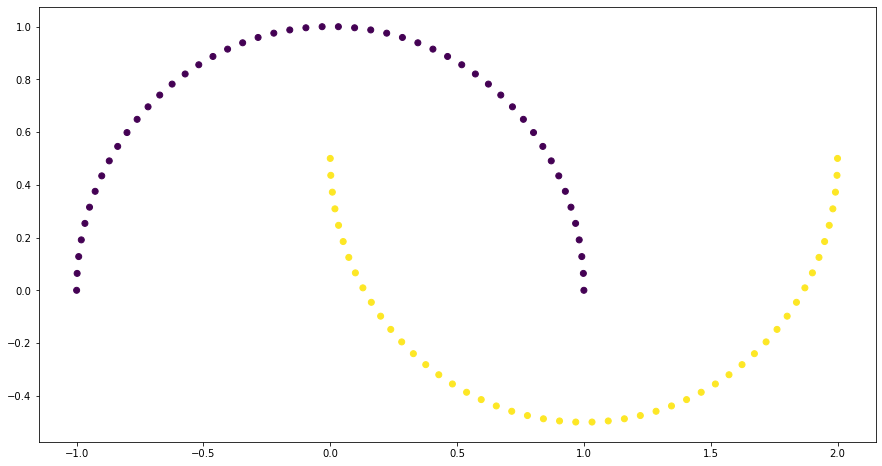

In [2892]:
#Scatter plot of updated Perceptron algorithm by classification prediction
plt.figure(figsize=(15, 8))
plt.scatter(label_new['X'],label_new['Y'], c=perceptron_class_guess)
plt.show()

<font size = "4">Logistic Regression</font>

In [2893]:
#Implement Logistic Regression algorithm using the polynomial features
logreg = LogisticRegression(x_poly, y_new, 100)
logreg_class_guess = []
for i in x_poly:
    guess = 0
    for j in range(len(logreg)):
        guess += i[j] * logreg[j]
    if guess > 0:
        logreg_class_guess.append(1)
    else:
        logreg_class_guess.append(0)
    
print(accuracy_score(y_new, logreg_class_guess))

0.95


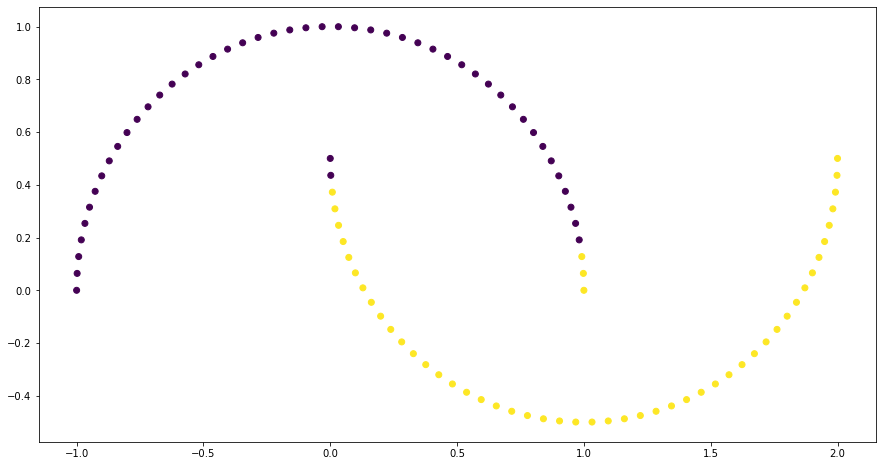

In [2894]:
#Scatter plot of updated Logistic Regression algorithm by classification prediction
plt.figure(figsize=(15, 8))
plt.scatter(label_new['X'],label_new['Y'], c=logreg_class_guess)
plt.show()